### Hello There after a stunt with Titanic , i survived the titanic crash ( i collected data officially being first human ever to live 250+ years) so here i am working for a bank which gave me a job after i landed in portugual from my titanic crash, therefore i was tasked for utilising their data on marketing and give them insights (" i wish i could learn portuguese , soon enough will do ")

### Problem statement given to me is to predict if the client will subscribe a term deposit or not 

Apparently my powers are affected i am unable to fetch the data from repo ,seems like i gotta use emanuel way to bring the data  

In [1]:
import pandas as pd 

### Stage 1 : - Data Collection ( used the bank additional dataset with 41k rows )

In [2]:
dataset = pd.read_csv("bankem data.csv")

dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
dataset.info() #this here is used to get me info on all types of guests attending the banks marketing party called scikit party

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### from the given dataset info we can look into the dataset and understand that there are primarily 3 types of people :- 

#### 1. Int64 ( discrete ) 
#### 2. float64 ( continous ) 
#### 3. object ( ordinal / nominal ) 


there are 5 columns that are unaccounted for and i have no information regarding why it exists therefore dropping them out of party list 

in order to predict if there would be a term deposit, understanding finanical terms is important therefore people who attend our party will be able to figure invest in our state of the art deposit for booze called term deposit 

### Context :- a term deposit is where u deposit money for a x amount of time which is usually shorter tenure than a fixed deposit for x amount intrest rate ( which could later be used for buying extra beverage ) and the depositor is not allowed to withdraw money for that tenure of time.



### Stage 2 :- Data cleaning 

in here i clean the data to see if i find any fragments from my past adventures and fill them with joy of numbers 

In [4]:
train_dataset = dataset.drop(columns=['emp.var.rate','cons.price.idx','euribor3m','nr.employed','cons.conf.idx'])

In [5]:
train_dataset 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes


#### Beautiful , we ended up removing the columns that have no significance and now we are going to check for null values before we start our eda 

In [6]:
train_dataset.describe()

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


#### 1. The average age of people who want cool term deposit is 40 years, the average duration of contact from bank for term deposit was at 258 seconds , the average contacts performed ( Campaign ) per person is 2, the average time passed after contacting from previous campaign is 962 days ,

#### 2. The age varies by 10 years, 

#### 3. Minimum age where people start term deposit is 17 years and maximum is 98 years ( they are immortals ) , the minimum  contacts performed per person is 1, 

#### 4. 25% of the data is below 32 years ,duration at 102 seconds and time passed after contacting from previous campaign is 999 days , 50% of the data is below 38 years , duration at 180 seconds per contact , contacts performed is 2  and 75% of the data is below 47 years  where the duration is at 319 seconds followed by the contact being done per person at 3 times with the previous record being 999 days.

#### I found that the given data is not skewed as you see the mean is 40 years  and the median ( 50%) is 38 the skewness is little 

In [7]:
train_dataset.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

#### Beautiful ! , we have no null values in this dataset ---> we can proceed forward with understanding the distribution and variables and check for outliers 

### Stage 3 :- Data preprocessing  + EDA 

in this stage we try to see what values behaving excited and try to understand what type of distributions of drinks and whose making more noise through mapping them on a dance floor and i will make it better for the party ahead at the scikit party.

Apparently i mixed the drinks made it into a data preprocessing + eda , now the boss is gonna enjoy a little more documentation

In [8]:
import matplotlib.pyplot as plt 

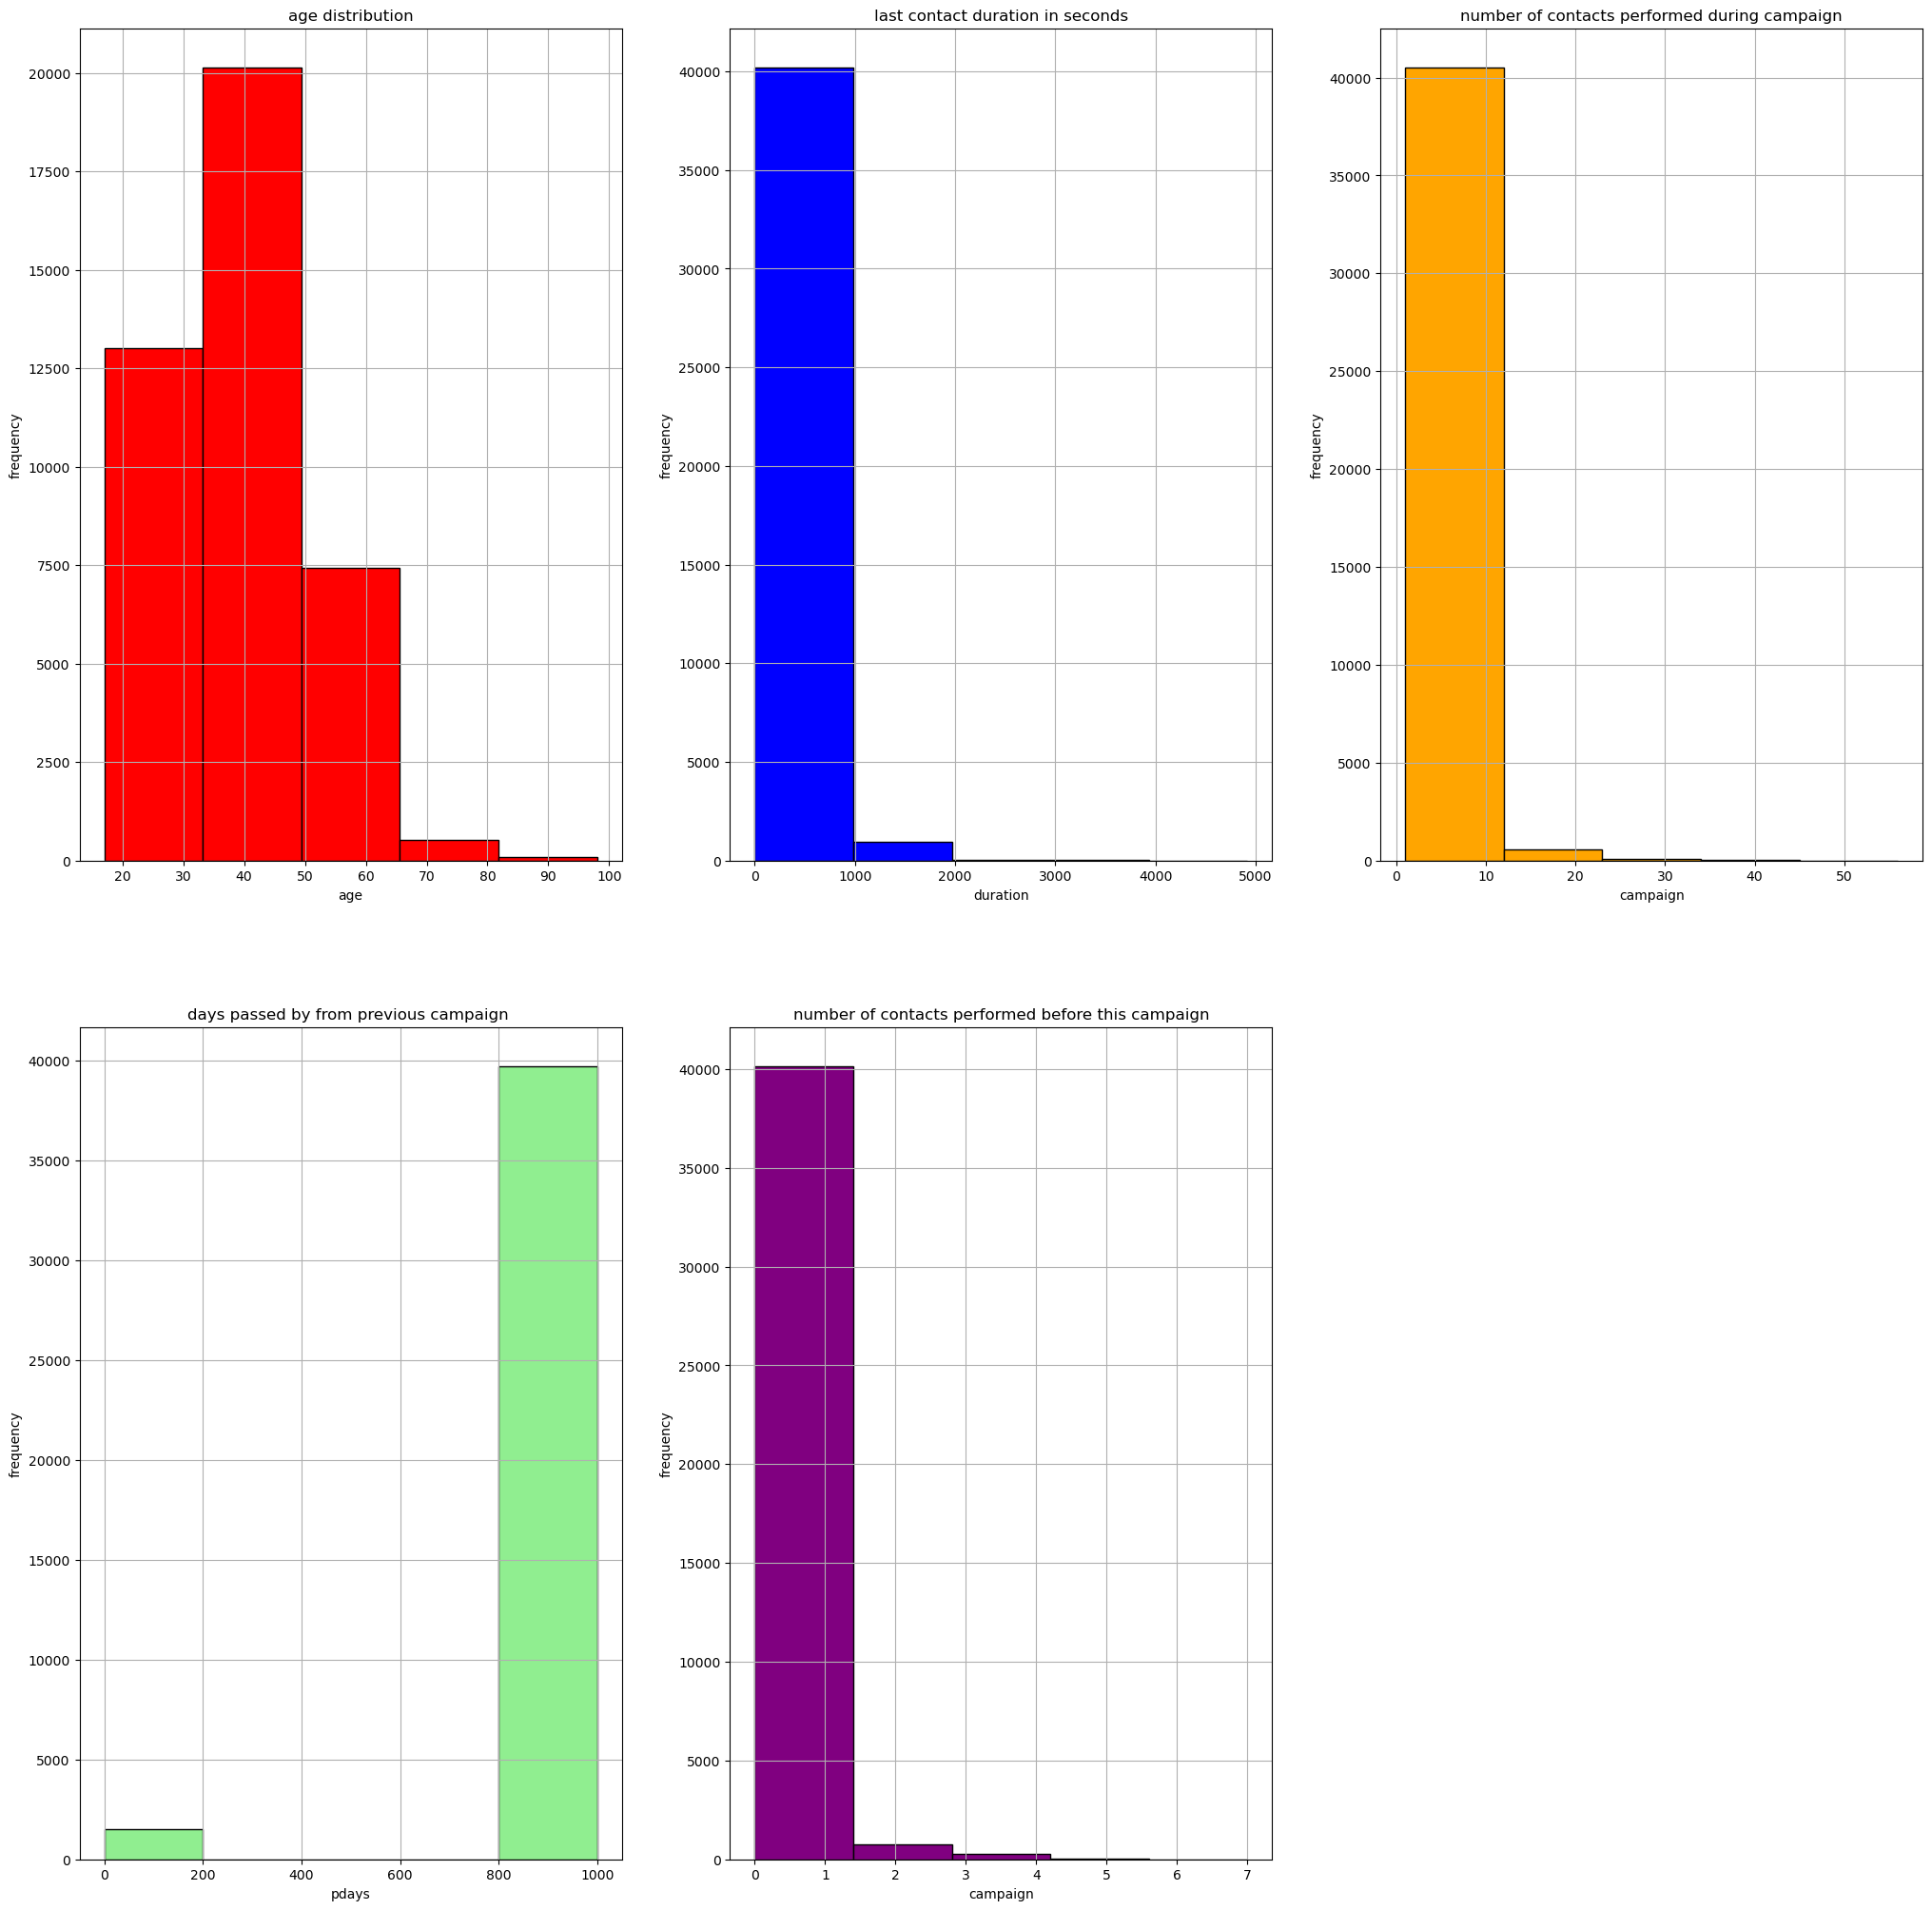

In [9]:
plt.figure(figsize=(25,25))
plt.subplot(2,3,1)
train_dataset['age'].hist(bins=5,color='red',edgecolor = 'black')
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('frequency')

plt.subplot(2,3,2)
train_dataset['duration'].hist(bins=5,color='blue',edgecolor = 'black')
plt.title('last contact duration in seconds')
plt.xlabel('duration')
plt.ylabel('frequency')

plt.subplot(2,3,3)
train_dataset['campaign'].hist(bins=5,color='orange',edgecolor = 'black')
plt.title('number of contacts performed during campaign')
plt.xlabel('campaign')
plt.ylabel('frequency')

plt.subplot(2,3,4)
train_dataset['pdays'].hist(bins=5,color='lightgreen',edgecolor='black')
plt.title("days passed by from previous campaign ")
plt.xlabel("pdays")
plt.ylabel("frequency")

plt.subplot(2,3,5)
train_dataset['previous'].hist(bins = 5,color="purple",edgecolor="black")
plt.title("number of contacts performed before this campaign")
plt.xlabel("campaign")
plt.ylabel("frequency")

plt.show()


#### From the given Subplots we can identify that the data for Age, Campaign , duration , Previous Contacts ,pdays( time passed ) are as follows 


#### 1. The age distribution showcases that the highest amount of customers are from the age group 20 - 50 and followed by a little customer base from 60+ 

#### 2. The Duration indicates that the contact regarding the term deposit is at 0 - 1000 seconds , at maximum of 2000 seconds which is extremely small compared to the entire dataset ( which happens to be a outlier ) 

#### 3. The Contacts performed for the per person is at 0 - 10 during the campaign

#### 4. The previous contacts that was made before the existing campaign per person is at 0-1 and at some instances more than twice

#### 5. The days passed by from previous campaign is from 800 days to 1000 days with a slight change in the distribution where we can see there were some cases of being contacted before exisiting campaign for 200 days. 


### This distribution indicates Right Skewed Data Distribution  


##### we are done understanding about the data now its time to transform for the party at scikit 

In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [11]:
categorical_cols =  ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

encoder = OneHotEncoder(drop='first',sparse_output=False)

encoded_data = encoder.fit_transform(train_dataset[categorical_cols])

encoded_columns = encoder.get_feature_names_out(categorical_cols)

encoded_df = pd.DataFrame(encoded_data,columns=encoded_columns,index=train_dataset.index)

train_dataset = train_dataset.drop(categorical_cols, axis=1 ) 
train_dataset = pd.concat([train_dataset,encoded_df],axis=1)

train_dataset

,age,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,no,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,57,149,1,999,0,no,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,226,1,999,0,no,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40,151,1,999,0,no,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,56,307,1,999,0,no,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,yes,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,46,383,1,999,0,no,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,56,189,2,999,0,no,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41186,44,442,1,999,0,yes,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
le = LabelEncoder()
train_dataset['y'] = le.fit_transform(train_dataset['y'])
print(train_dataset['y'].head())

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32


In [13]:
train_dataset # as you can see we have completely changed our guest list 

,age,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,57,149,1,999,0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,226,1,999,0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40,151,1,999,0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,56,307,1,999,0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,46,383,1,999,0,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,56,189,2,999,0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41186,44,442,1,999,0,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Ladies and Gentlemen we have converted our data into understandable Data for our model at the scikit party less goo !!! 

### Stage 4 :- Model Building ( we build the party house before the party begins )

In [14]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import numpy as np

In [15]:
x= train_dataset.drop('y',axis=1)
y=train_dataset['y']

In [16]:
print("shape of x ",x.shape)
print('y of shape',y.shape)

shape of x  (41188, 48)
y of shape (41188,)


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32950, 48)
(32950,)
(8238, 48)
(8238,)


In [34]:
model = DecisionTreeClassifier(max_depth = 20 , class_weight = 'balanced' , random_state = 42)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(f'Accuray :{accuracy_score(y_test,y_pred)}')

Accuray :0.8629521728574897


In [32]:
scores = cross_val_score(model , x, y, cv = 5, scoring='accuracy')
print(f'cross validation accuracy : {scores.mean()} \u00b1 {scores.std()}')

cross validation accuracy : 0.6735410832103309 ± 0.09773471263542985


### As u can see here we built a beautiful algorithm to see how many people show up and it says 80% but i am not confident therefore gonna get a new understanding 

### Stage 5 :- Model Testing and optimization 

In [20]:
from sklearn.ensemble import RandomForestClassifier 

#### we using a new algo to find out if i could be satisfied with the people showing up 

In [35]:
rf_model = RandomForestClassifier(n_estimators = 150 , max_depth = 20 , class_weight = 'balanced' , random_state = 42)

rf_model.fit(x_train,y_train)

y_rf_pred = rf_model.predict(x_test)

print(f'accuracy : {accuracy_score(y_test,y_rf_pred)}')

accuracy : 0.8962126729788784


In [36]:
rscores = cross_val_score(rf_model , x, y, cv = 5, scoring='accuracy')
print(f'cross validation accuracy : {rscores.mean(): .3f} \u00b1 {rscores.std(): .3f}')

cross validation accuracy :  0.757 ±  0.074


In [26]:
cr1 = classification_report(y_test,model.predict(x_test))

cr2 = classification_report(y_test,rf_model.predict(x_test))

print(cr1)
print(cr2)

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      7303
           1       0.34      0.84      0.49       935

    accuracy                           0.80      8238
   macro avg       0.66      0.82      0.68      8238
weighted avg       0.90      0.80      0.83      8238

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7303
           1       0.41      0.85      0.55       935

    accuracy                           0.85      8238
   macro avg       0.69      0.85      0.73      8238
weighted avg       0.91      0.85      0.87      8238



In [47]:
importances = model.feature_importances_ #dtree feature importance
for feature, importance in zip(x.columns,importances):
    print(f'{feature}:{importance}')

age:0.09745908978593336
duration:0.39954940719367427
campaign:0.026966585849935866
pdays:0.12493917941513434
previous:0.01093429110497835
job_blue-collar:0.009663211315551602
job_entrepreneur:0.002576435736689206
job_housemaid:0.002393044971258571
job_management:0.003981555295926033
job_retired:0.0020975214196124197
job_self-employed:0.004151517390351321
job_services:0.006459691652851056
job_student:0.003393902790647168
job_technician:0.005811669949710572
job_unemployed:0.0035035295190658927
job_unknown:0.0009358651554357213
marital_married:0.006705947626322857
marital_single:0.003963227048214937
marital_unknown:0.0004216779248820602
education_basic.6y:0.0036102525612660467
education_basic.9y:0.006518648187355993
education_high.school:0.005960298335704381
education_illiterate:0.0
education_professional.course:0.005025530806503932
education_university.degree:0.00722792828959157
education_unknown:0.003074824332544385
default_unknown:0.017744751147546613
default_yes:0.0
housing_unknown:0.

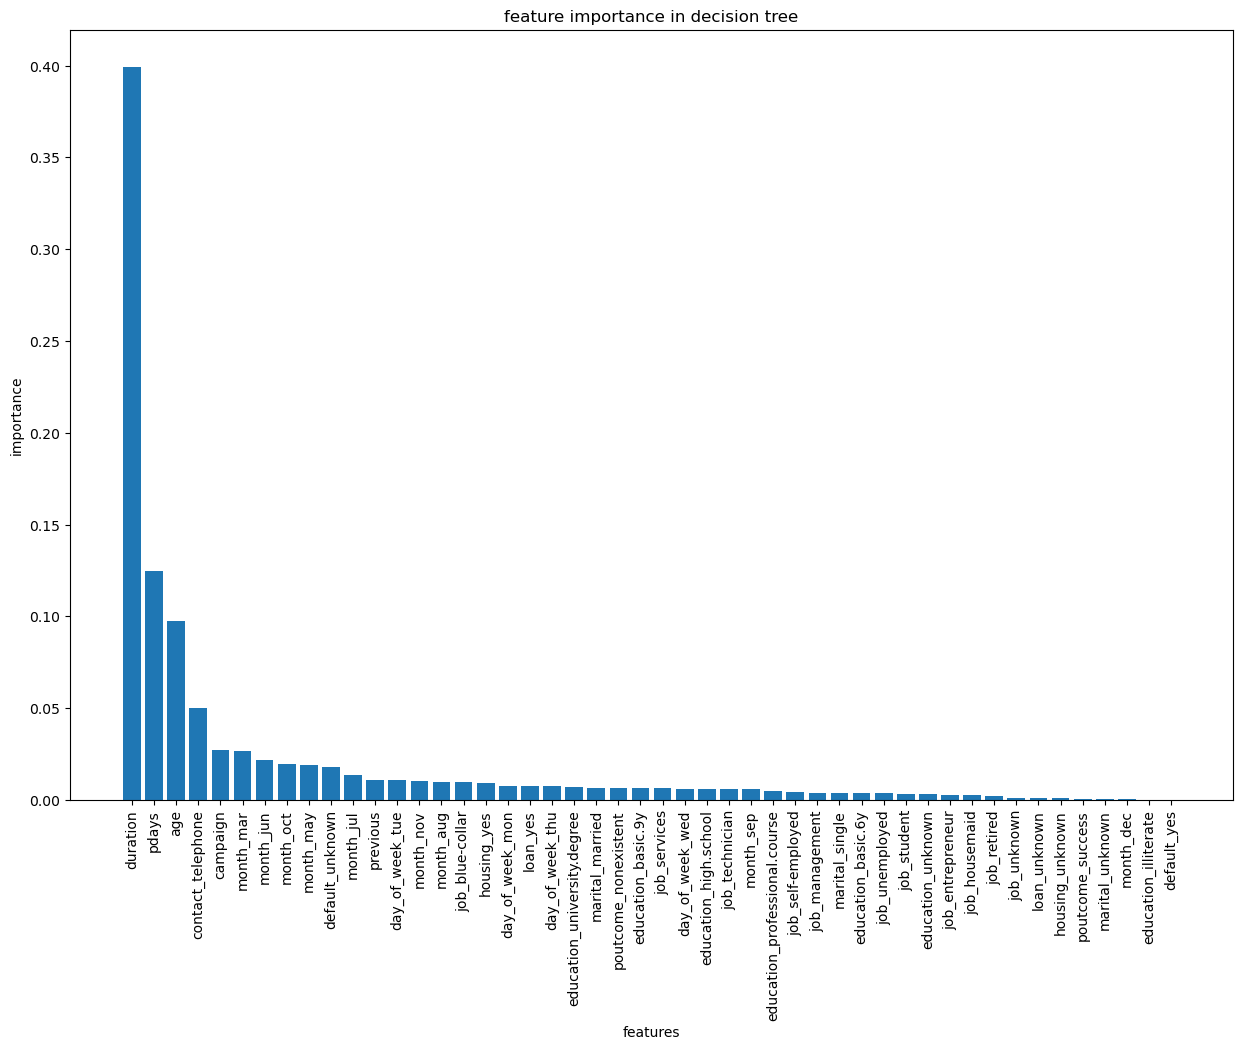

In [45]:
feature_names = x.columns 
importance_values = model.feature_importances_

sorted_idx = importance_values.argsort()[::-1]
feature_names_sort = [feature_names[i] for i in sorted_idx]
importance_values_sort = importance_values[sorted_idx]


plt.figure(figsize=(15,10))
plt.bar(range(len(importance_values_sort)),importance_values_sort)
plt.xticks(range(len(importance_values_sort)),feature_names_sort,rotation = 90)
plt.xlabel("features")
plt.ylabel("importance")
plt.title("feature importance in decision tree")
plt.show()

#### Feature importance  in decision tree , we see how these affect the people to show up :- Duration of the call is at 39%  , pday is at 12 % suggesting that the campaign strategies should be focused on call length and timely follow ups.

In [38]:
rimportances = rf_model.feature_importances_
for feature, importance in zip(x.columns,rimportances):
    print(f'{feature}:{importance}')

age:0.08104641325040335
duration:0.413064467133141
campaign:0.03605226070126766
pdays:0.04012755997167722
previous:0.021226885097928905
job_blue-collar:0.00886753042346236
job_entrepreneur:0.0034119284300642696
job_housemaid:0.0024997194857925022
job_management:0.004866230214958661
job_retired:0.006635952405166583
job_self-employed:0.003573617606196778
job_services:0.005436794296544194
job_student:0.006868900282507813
job_technician:0.00746867239288724
job_unemployed:0.003986217833118892
job_unknown:0.0012744822553581296
marital_married:0.009525443646311629
marital_single:0.008995047973928224
marital_unknown:0.0004446558360290995
education_basic.6y:0.003750338877776319
education_basic.9y:0.007013267863193539
education_high.school:0.0077658045085374685
education_illiterate:0.00010689955697567295
education_professional.course:0.005936753587318355
education_university.degree:0.009788856565260134
education_unknown:0.004018190616318512
default_unknown:0.018549067907403863
default_yes:8.2986

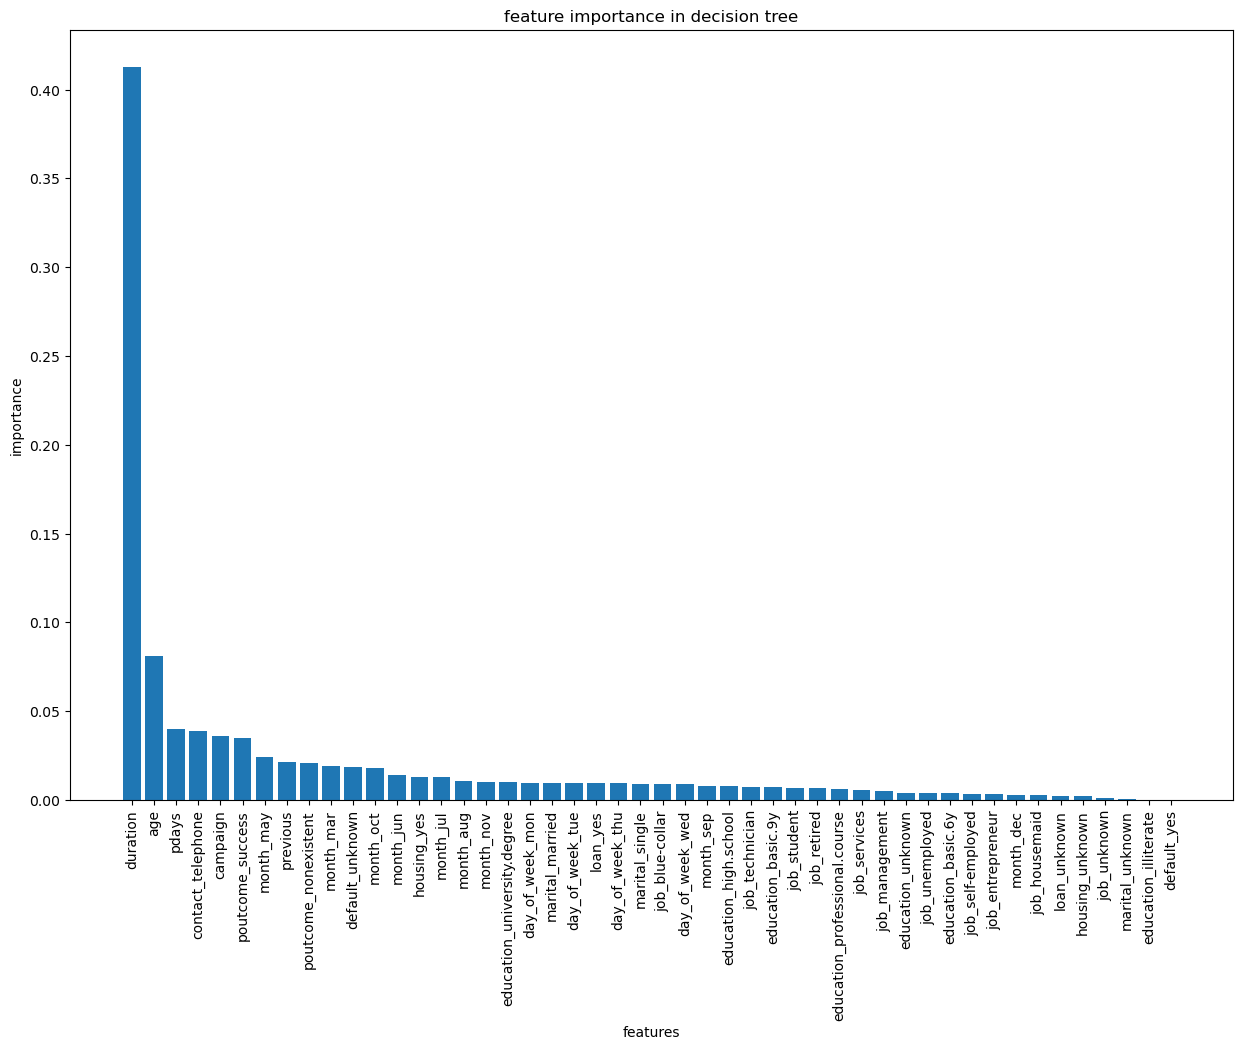

In [46]:
rfeature_names = x.columns 
rimportance_values = rf_model.feature_importances_

rsorted_idx = rimportance_values.argsort()[::-1]
rfeature_names_sort = [rfeature_names[i] for i in rsorted_idx]
rimportance_values_sort = rimportance_values[rsorted_idx]


plt.figure(figsize=(15,10))
plt.bar(range(len(rimportance_values_sort)),rimportance_values_sort)
plt.xticks(range(len(rimportance_values_sort)),rfeature_names_sort,rotation = 90)
plt.xlabel("features")
plt.ylabel("importance")
plt.title("feature importance in decision tree")
plt.show()

## Observations :- 

### 1. The duration of time spent on call contributes to 40% 

### 2. Age group at 8% contributes towards campaigns & more term deposits 

### 3. Follow ups at 4 %  will likely increase subcription likelihood 

### 4. Contact method ,campaign , previous campaign outcome these 3 factors each contribute 3% giving us the understanding that clients respond more with cellular devices more and successful previous campaign gives them more initiative to come for term deposits .

### thus focusing on the above features plays strategic significance in the bank marketing campaign showcasing  that investing in time on these features will lead to successful term deposit. 


### Alright time to get the scikit party started now that we found out whats stopping these people from getting more new customers 

### Therefore i can now focus on other tasks such as finding out that one portugese book to study to  get more sales 💲 giving me more oppurtunity  , cya on next one
